In [ ]:
import geometricus
from pathlib import Path
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prody as pd

In [79]:
PDB_ID = "1E9H"

In [80]:
protein = pd.parsePDB(PDB_ID, chain="A")

In [81]:
moment_types = list(geometricus.MomentType)

In [82]:
invariants_kmer = geometricus.MomentInvariants.from_prody_atomgroup(PDB_ID, protein, split_info=geometricus.SplitInfo(
    geometricus.SplitType.KMER, 16), moment_types=moment_types)

In [83]:
invariants_kmer.moments.shape

(296, 16)

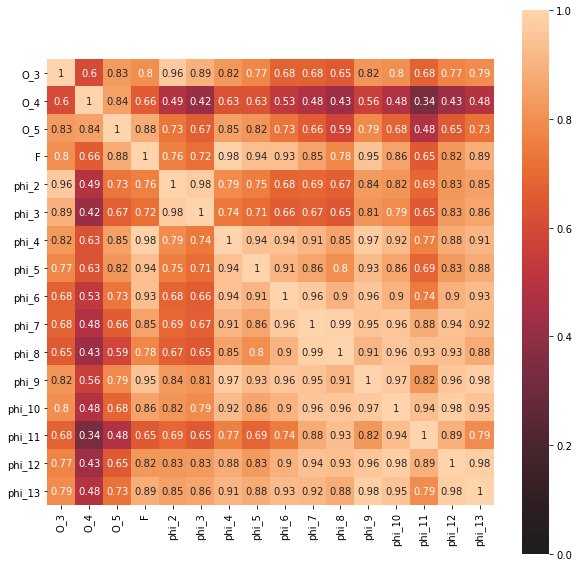

In [84]:
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(invariants_kmer.moments.T),
            xticklabels=[m.name for m in moment_types],
            yticklabels=[m.name for m in moment_types],
            vmin=0, vmax=1,
            center=0, annot=True, square=True)

In [85]:
invariants_radius = geometricus.MomentInvariants.from_prody_atomgroup(PDB_ID, protein, split_info=geometricus.SplitInfo(
    geometricus.SplitType.RADIUS, 10), moment_types=moment_types)

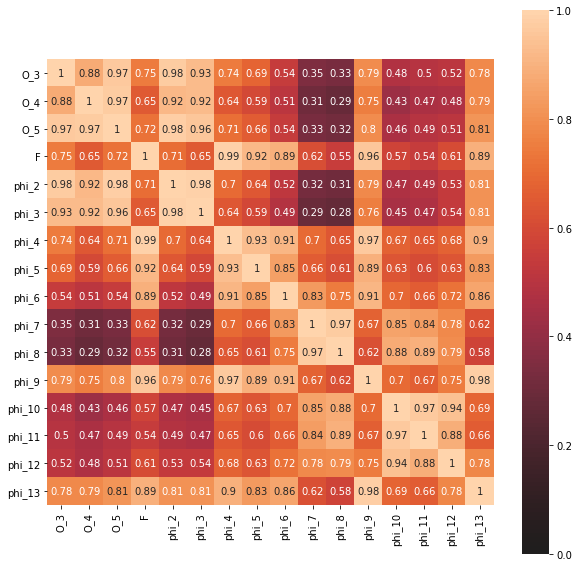

In [86]:
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(invariants_radius.moments.T),
            xticklabels=[m.name for m in moment_types],
            yticklabels=[m.name for m in moment_types],
            vmin=0, vmax=1,
            center=0, annot=True, square=True)